In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting

### Gradient Boosting from Scratch

In [2]:
from sklearn.tree import DecisionTreeRegressor

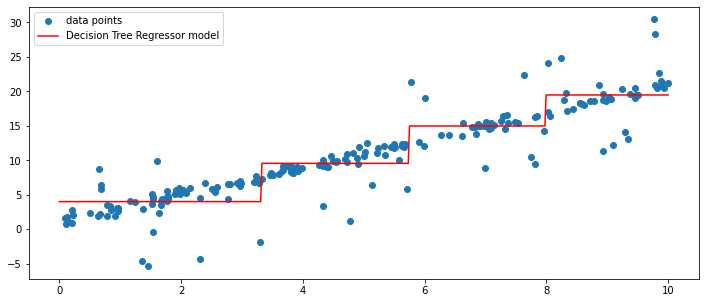

In [3]:
# A 1D regression with decision tree
m = 200
x = 10 * np.random.rand(m,1)
y = 2*x + 1 + 0.5*np.random.randn(m,1)
y[::5,:] += 20 * (0.5 - np.random.rand(m//5,1)) # add outliers
y = y.flatten()

# decision tree
reg_tree1 = DecisionTreeRegressor(max_depth=2)
reg_tree1.fit(x,y)

# plot data
plt.figure(figsize=(12,5))
plt.scatter(x,y,label='data points')

# plot model
x_plot = np.linspace(0,10,500).reshape(500,1)
y_plot = reg_tree1.predict(x_plot)

plt.plot(x_plot,y_plot, c='red',label='Decision Tree Regressor model')

plt.legend()

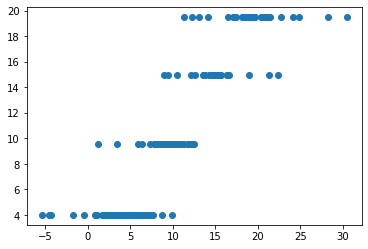

In [4]:
y1_pred = reg_tree1.predict(x)
plt.scatter(y,y1_pred)

Text(0.5, 1.0, 'residuals')

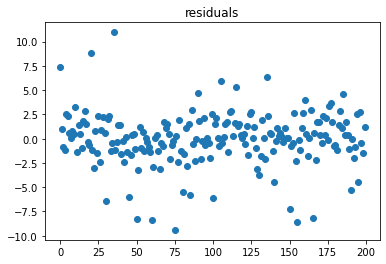

In [5]:
# compute the residuals (difference between actual and predicted values)
y2 = y - y1_pred
plt.plot(y2,'o')
plt.title('residuals')

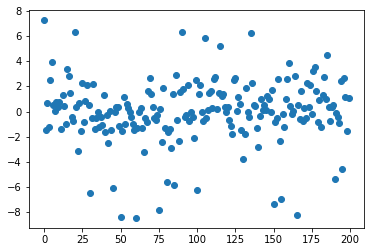

In [6]:
# Fit the new tree on the residuals
reg_tree2 = DecisionTreeRegressor(max_depth=2)
reg_tree2.fit(x,y2)
# compute new residuals
y2_pred = reg_tree2.predict(x)
y3 = y2-y2_pred
plt.plot(y3,'o')

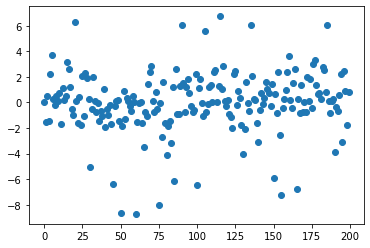

In [7]:
# repeat
reg_tree3 = DecisionTreeRegressor(max_depth=2)
reg_tree3.fit(x,y3)
# compute new residuals
y3_pred = reg_tree3.predict(x)
y4 = y3-y3_pred
plt.plot(y4,'o')

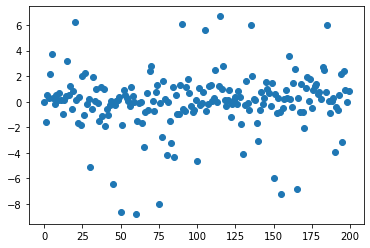

In [8]:
reg_tree4 = DecisionTreeRegressor(max_depth=2)
reg_tree4.fit(x,y4)
# compute new residuals
y4_pred = reg_tree4.predict(x)
y5 = y4-y4_pred
plt.plot(y5,'o')

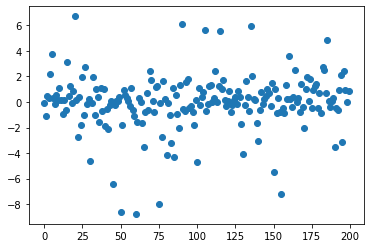

In [9]:
reg_tree5 = DecisionTreeRegressor(max_depth=2)
reg_tree5.fit(x,y5)
# compute new residuals
y5_pred = reg_tree5.predict(x)
y6 = y5-y5_pred
plt.plot(y6,'o')

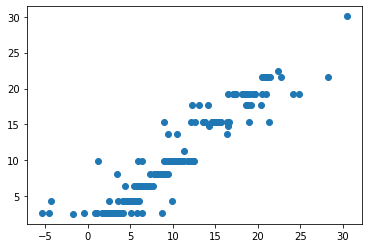

In [10]:
# predictions
y_pred = y1_pred + y2_pred + y3_pred + y4_pred + y5_pred
plt.scatter(y,y_pred)

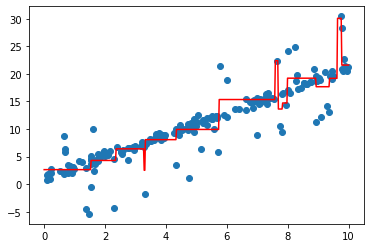

In [11]:
# plot gradient boosting model
y1_plot = reg_tree1.predict(x_plot)
y2_plot = reg_tree2.predict(x_plot)
y3_plot = reg_tree3.predict(x_plot)
y4_plot = reg_tree4.predict(x_plot)
y5_plot = reg_tree5.predict(x_plot)
y_plot = y1_plot + y2_plot + y3_plot + y4_plot + y5_plot

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')

## Building a gradient boosting model in scikit-learn

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

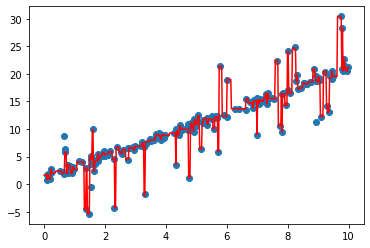

In [13]:
# learning rate < 1 slows down the convergence to zero residuals (it prevents overfitting)
gb_reg = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate=1)
gb_reg.fit(x,y)
y_plot = gb_reg.predict(x_plot)
plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')

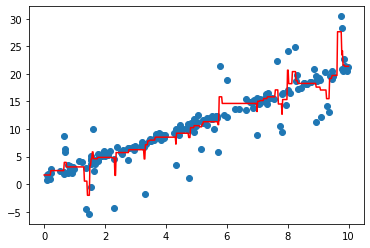

In [14]:
# as n_estimators, the number of trees, goes up, learning_rate should go down.
gb_reg = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate=0.1)
gb_reg.fit(x,y)
y_plot = gb_reg.predict(x_plot)
plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')